# Spotify Analysis

1. download dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")

print("Path to dataset files:", path)

100%|██████████| 96.8k/96.8k [00:00<00:00, 280kB/s]

Extracting files...
Path to dataset files: C:\Users\bakru_b9pmn2k\.cache\kagglehub\datasets\nabihazahid\spotify-dataset-for-churn-analysis\versions\2


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("spotify_churn_dataset.csv")

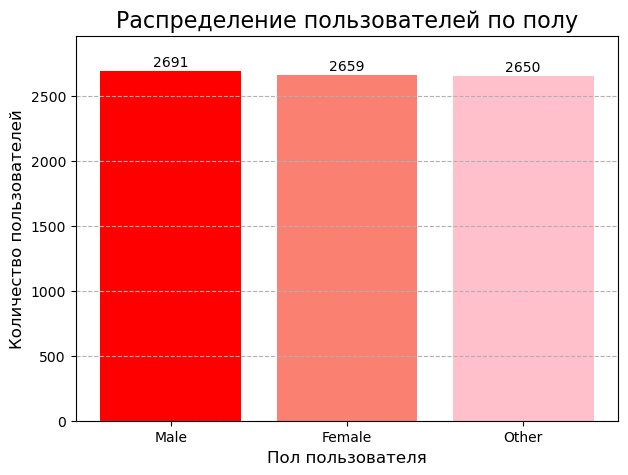

In [ ]:
gender_counts = data["gender"].value_counts()
max_count = gender_counts.max() 

plt.figure(figsize=(7, 5))

plt.bar(
    gender_counts.index,       
    gender_counts.values,      
    color=['red', 'salmon', 'pink'][:len(gender_counts)], 
)


padding = max_count * 0.1
plt.ylim(0, max_count + padding) 


plt.title("Распределение пользователей по полу", fontsize=16)
plt.xlabel("Пол пользователя", fontsize=12)
plt.ylabel("Количество пользователей", fontsize=12) 

for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--')
plt.show()

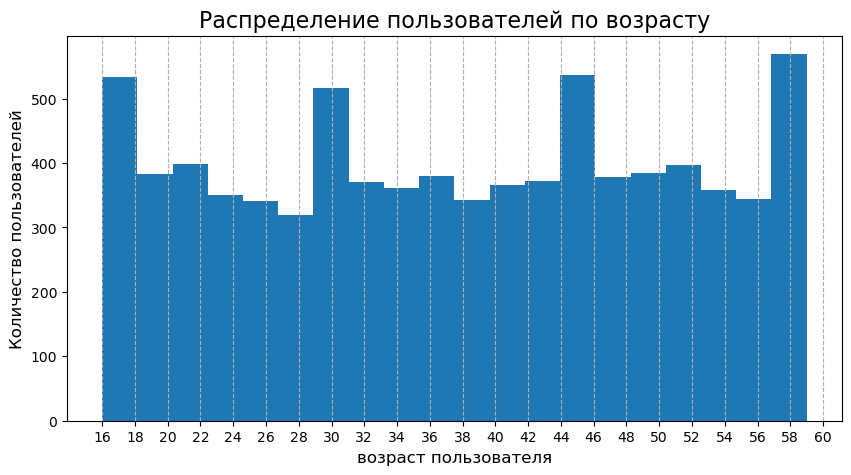

In [29]:
plt.figure(figsize=(10, 5))

plt.hist(data['age'], bins=20)

step = 2
min_age = data['age'].min()
max_age = data['age'].max()

x_ticks = np.arange(int(min_age), int(max_age) + step, step) 

plt.xticks(x_ticks)
plt.grid(visible=True, axis='x', linestyle='--')
plt.title("Распределение пользователей по возрасту", fontsize=16)
plt.xlabel("возраст пользователя", fontsize=12)
plt.ylabel("Количество пользователей", fontsize=12) 
plt.show()

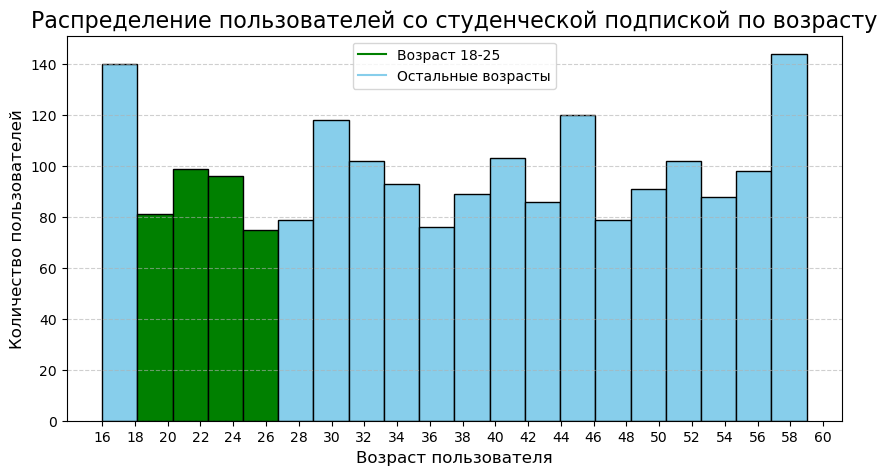

In [121]:
students_data_df = data[data['subscription_type'] == 'Student']
students_ages = students_data_df['age'].tolist() 

plt.figure(figsize=(10, 5))

n, bins, patches = plt.hist(
    students_ages, 
    bins=20, 
    color='skyblue', 
    edgecolor='black'
)

HIGHLIGHT_START = 18
HIGHLIGHT_END = 25
HIGHLIGHT_COLOR = 'green'
BASE_COLOR = 'skyblue'

for patch, left_bin_edge in zip(patches, bins):
    if left_bin_edge >= HIGHLIGHT_START and left_bin_edge < HIGHLIGHT_END:
        patch.set_facecolor(HIGHLIGHT_COLOR)
    else:
        patch.set_facecolor(BASE_COLOR)


step = 2
min_age = data['age'].min()
max_age = data['age'].max()
x_ticks = np.arange(int(min_age), int(max_age) + step, step) 

plt.xticks(x_ticks)
plt.grid(visible=True, axis='y', linestyle='--', alpha=0.6) # Сетка по Y лучше для hist
plt.title("Распределение пользователей со студенческой подпиской по возрасту", fontsize=16)
plt.xlabel("Возраст пользователя", fontsize=12)
plt.ylabel("Количество пользователей", fontsize=12) 

plt.plot([], [], color=HIGHLIGHT_COLOR, label=f'Возраст {HIGHLIGHT_START}-{HIGHLIGHT_END}')
plt.plot([], [], color=BASE_COLOR, label='Остальные возрасты')
plt.legend()

plt.show()

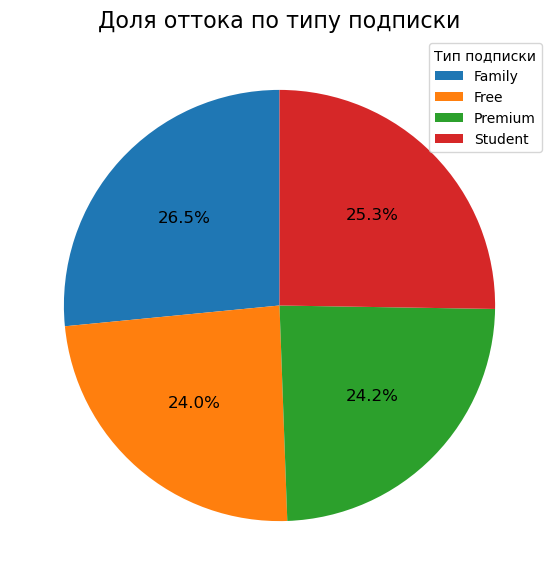

In [127]:
churn_rate = data.groupby('subscription_type')['is_churned'].mean()

plt.figure(figsize=(7, 7))

churn_rate.plot(
    kind='pie',
    autopct='%1.1f%%', 
    startangle=90, 
    labels=None,
    textprops={'fontsize': 12} 
)
plt.legend(title="Тип подписки", loc="best", labels=churn_rate.index)
plt.title("Доля оттока по типу подписки", fontsize=16)
plt.ylabel('') 
plt.show()

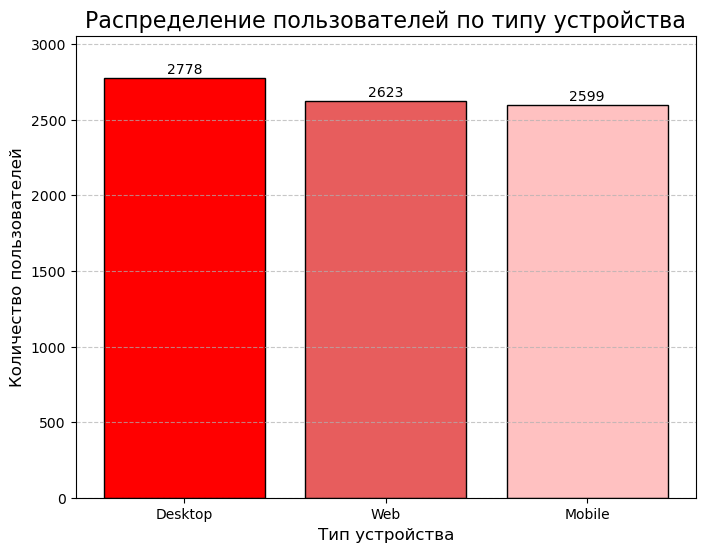

In [129]:
device_counts = data["device_type"].value_counts()
max_count = device_counts.max() 

plt.figure(figsize=(8, 6))

tree_colors = ["#FF0000", "#E75D5D", "#FFC1C1", "#FCE3E3"] 
colors_to_use = tree_colors[:len(device_counts)]

plt.bar(
    device_counts.index,        
    device_counts.values,       
    color=colors_to_use, 
    edgecolor='black'           
)

padding = max_count * 0.1
plt.ylim(0, max_count + padding) 


plt.title("Распределение пользователей по типу устройства", fontsize=16)
plt.xlabel("Тип устройства", fontsize=12)
plt.ylabel("Количество пользователей", fontsize=12) 

for i, count in enumerate(device_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()
